## This is only for learning purposes and not for real-life financial or investment use.

# 🔹 STEP 1: Load the Dataset

In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset
df = pd.read_csv(r'C:\Users\acer\learn_data_science2\time-series-analysis\time-series-analysis\XAU_USD_Historical_Data_(2015-2025).csv')

In [28]:
# Preview the first few rows
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/10/2025,"4,195.63","4,211.00","4,218.84","4,188.07",NaN,-0.33%
1,12/09/2025,"4,209.54","4,189.00","4,221.67","4,170.00",NaN,0.49%
2,12/08/2025,"4,189.05","4,197.19","4,219.31","4,176.34",NaN,-0.19%
3,12/05/2025,"4,197.13","4,208.69","4,259.55","4,191.95",NaN,-0.27%
4,12/04/2025,"4,208.69","4,206.15","4,219.46","4,174.60",NaN,0.06%


# 🔹 STEP 2: Clean and Preprocess the Data

In [29]:
# Drop unnecessary columns
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

In [30]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop missing values
df.dropna(inplace=True)

Missing values in each column:
Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64


In [31]:

# Rename 'Price' to 'Close' for consistency with time series convention
df.rename(columns={'Price': 'Close'}, inplace=True)

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Final data structure check
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2602 entries, 2015-12-10 to 2025-12-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2602 non-null   object
 1   Open    2602 non-null   object
 2   High    2602 non-null   object
 3   Low     2602 non-null   object
dtypes: object(4)
memory usage: 101.6+ KB


In [32]:
df.head(5)

,Close,Open,High,Low
Date,,,,
2015-12-10,"1,071.54","1,073.21","1,076.46","1,069.70"
2015-12-11,"1,074.89","1,071.60","1,079.98","1,062.38"
2015-12-14,"1,062.90","1,073.69","1,077.70","1,062.77"
2015-12-15,"1,060.74","1,062.89","1,068.89","1,059.59"
2015-12-16,"1,072.94","1,060.73","1,078.59","1,060.64"


In [33]:
# Remove commas and convert 'Close' column to float
df['Close'] = df['Close'].str.replace(',', '')
df['Close'] = df['Close'].astype(float)

# 🔹 STEP 3: EDA — Visualizing the Gold Price

In [34]:
# Set visual style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 6)

### 📈 3.1: Line Plot with Moving Average (Smoothed Trend)

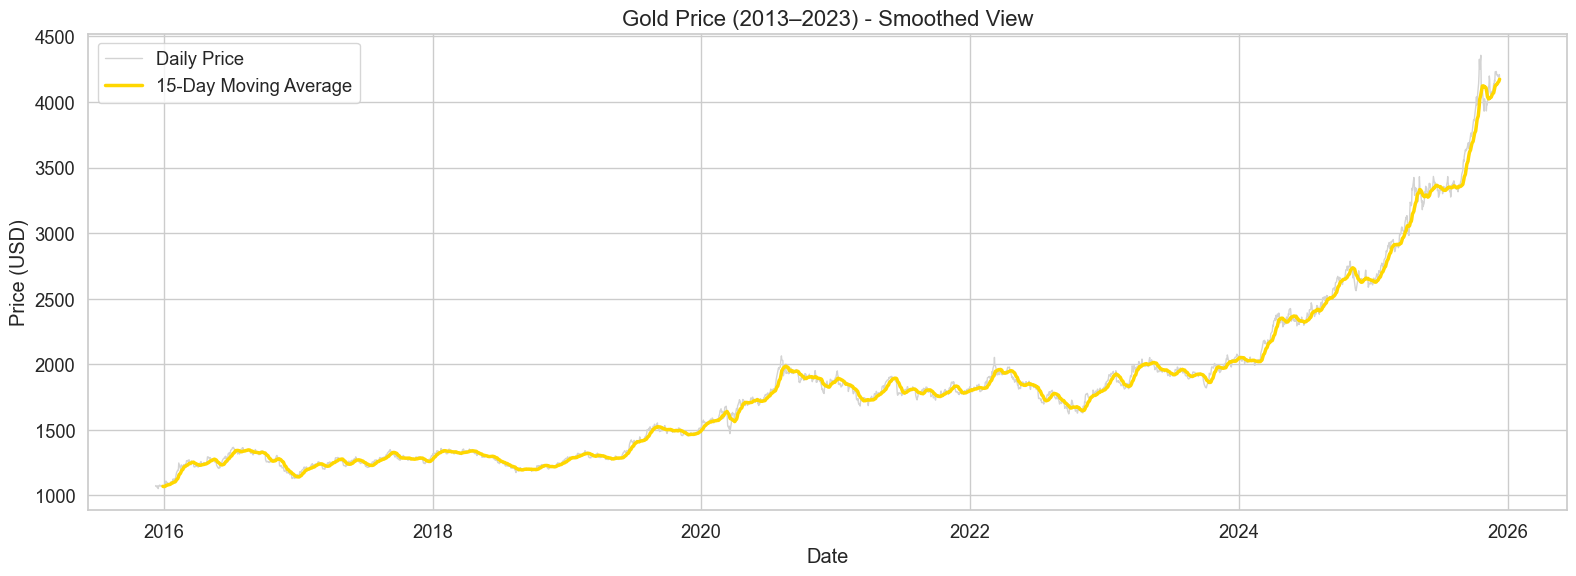

In [35]:
# 15-day moving average for smoother trend
df['MA_15'] = df['Close'].rolling(window=15).mean()

plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Close'], color='lightgrey', linewidth=1, label='Daily Price', alpha=1)
plt.plot(df.index, df['MA_15'], color='gold', linewidth=2.5, label='15-Day Moving Average')
plt.title('Gold Price (2013–2023) - Smoothed View', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### 📊 3.2: Distribution of Gold Prices (Histogram)

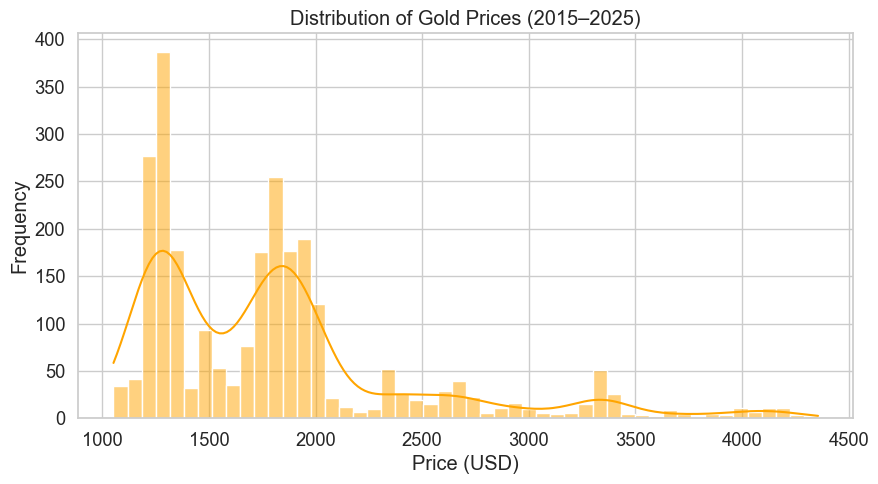

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=50, kde=True, color='orange')
plt.title('Distribution of Gold Prices (2015–2025)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


### 🔁 3.3: ACF (Auto-correlation)

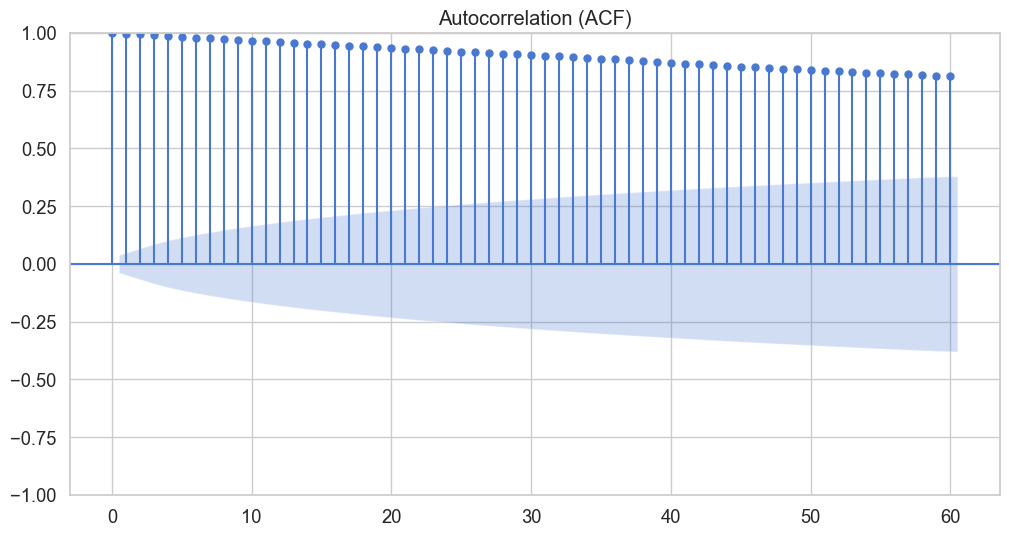

In [37]:
# ACF to understand if today's gold price is related to past prices
plot_acf(df['Close'], lags=60)
plt.title('Autocorrelation (ACF)')
plt.show()


> The ACF plot shows strong autocorrelation across many lags, indicating non-stationarity in the time series.

### 🔄 3.4: Seasonal Decomposition

C:\Users\acer\AppData\Local\Temp\ipykernel_13060\3715172866.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Close'].resample('M').mean()


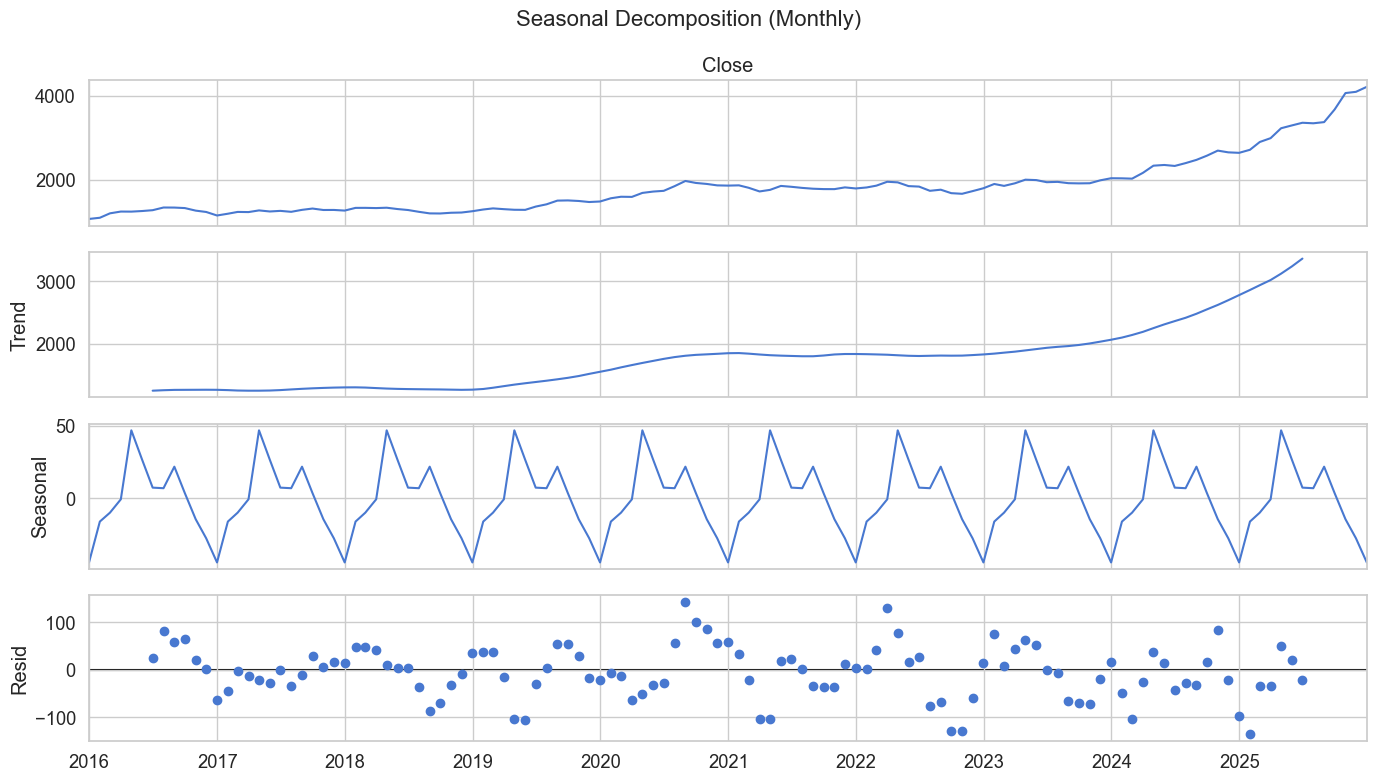

In [38]:
# it's used to break down time series data into components
from statsmodels.tsa.seasonal import seasonal_decompose

monthly_df = df['Close'].resample('M').mean()

decomposition = seasonal_decompose(monthly_df, model='additive')

fig = decomposition.plot()
fig.set_size_inches(14, 8) # make it wider and taller
plt.suptitle('Seasonal Decomposition (Monthly)', fontsize=16)
plt.tight_layout()
plt.show()


### 📉 3.5: Daily % Change (Volatility)

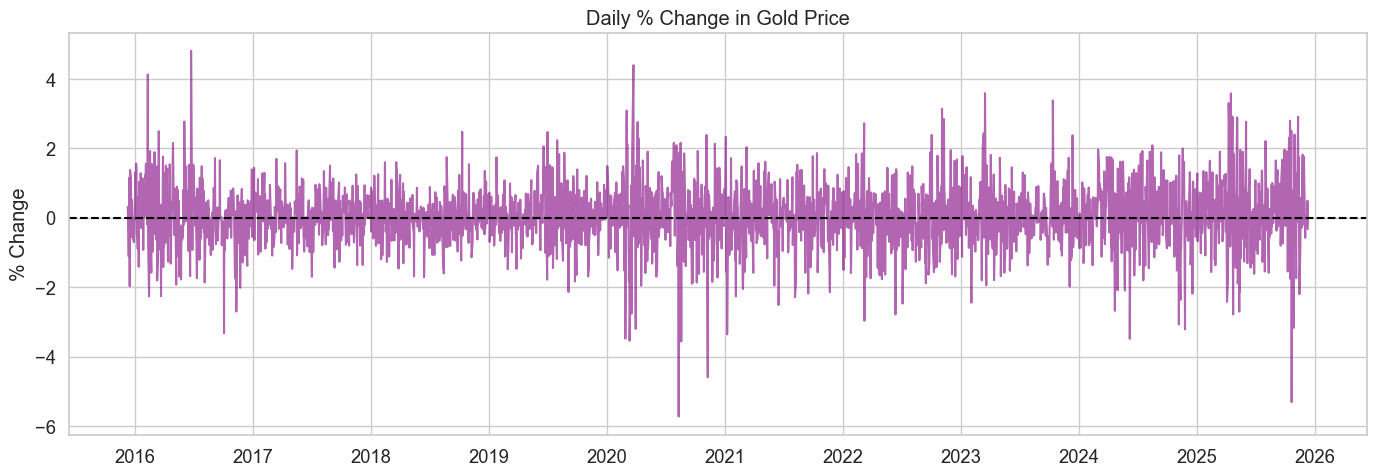

In [39]:
df['Daily_Change'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Daily_Change'], color='purple', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Daily % Change in Gold Price')
plt.ylabel('% Change')
plt.tight_layout()
plt.show()


### 📊 3.6: Boxplots by Year and Month

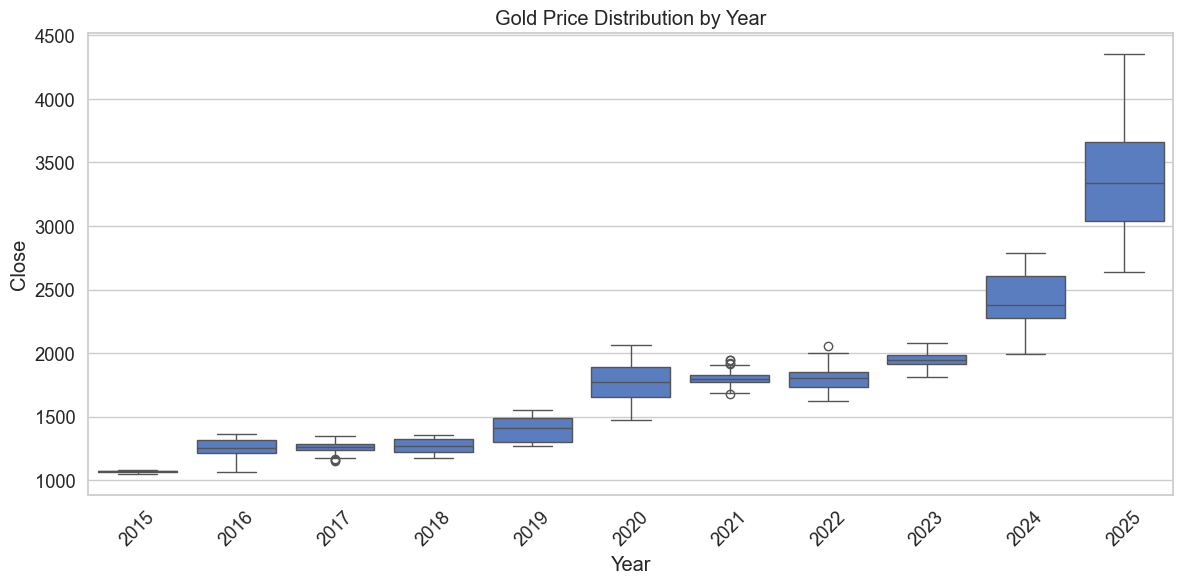

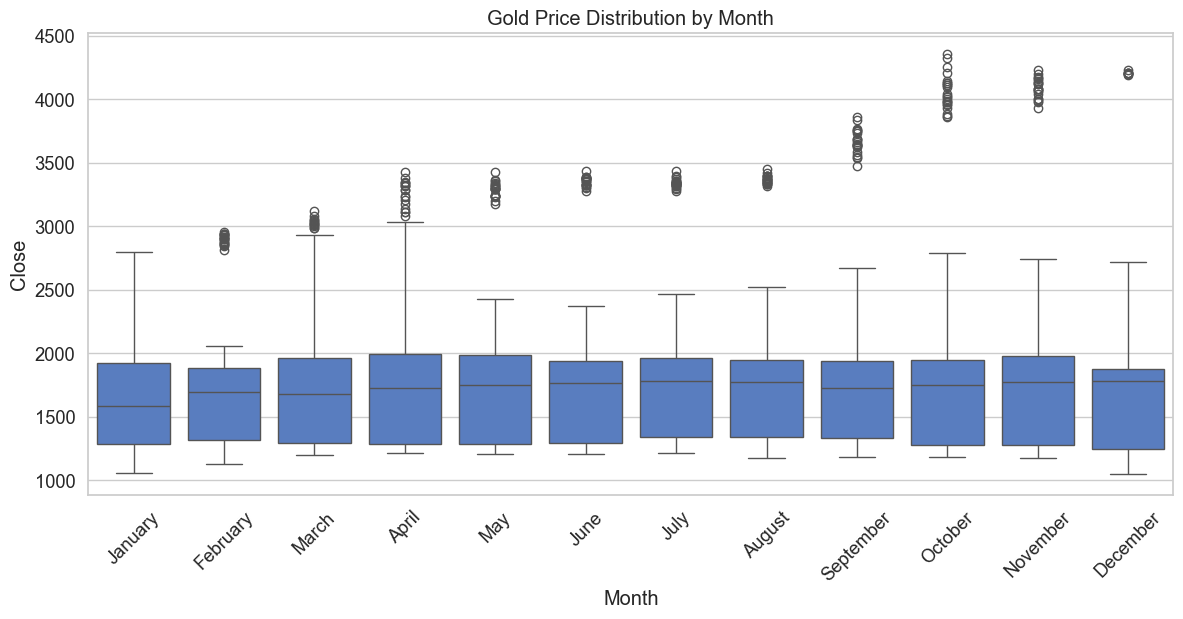

In [40]:
df['Year'] = df.index.year
df['Month'] = df.index.month_name()

# Boxplot by Year
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Gold Price Distribution by Year')
plt.xticks(rotation=45)
plt.show()

# Boxplot by Month (Ordered)
# The boxplot shows the distribution of gold prices across all years for each month
plt.figure(figsize=(14, 6))
sns.boxplot(x='Month', y='Close', data=df, order=[
    'January','February','March','April','May','June','July',
    'August','September','October','November','December'])
plt.title('Gold Price Distribution by Month')
plt.xticks(rotation=45)
plt.show()


# 🔹 STEP 4: Data Preparation

In [41]:
window_size = 60
# Use only the 'Close' price
data = df[['Close']].copy()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Get test size based on all of 2022 data
test_size = df[df.index.year == 2022].shape[0]

# Split chronologically
train_data = scaled_data[:-test_size]
# from len(data) - test_size - window_size and go to the end
test_data = scaled_data[-test_size - window_size:] 

print("Scaled data shape:", scaled_data.shape)
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Scaled data shape: (2602, 1)
Train shape: (2342, 1)
Test shape: (320, 1)


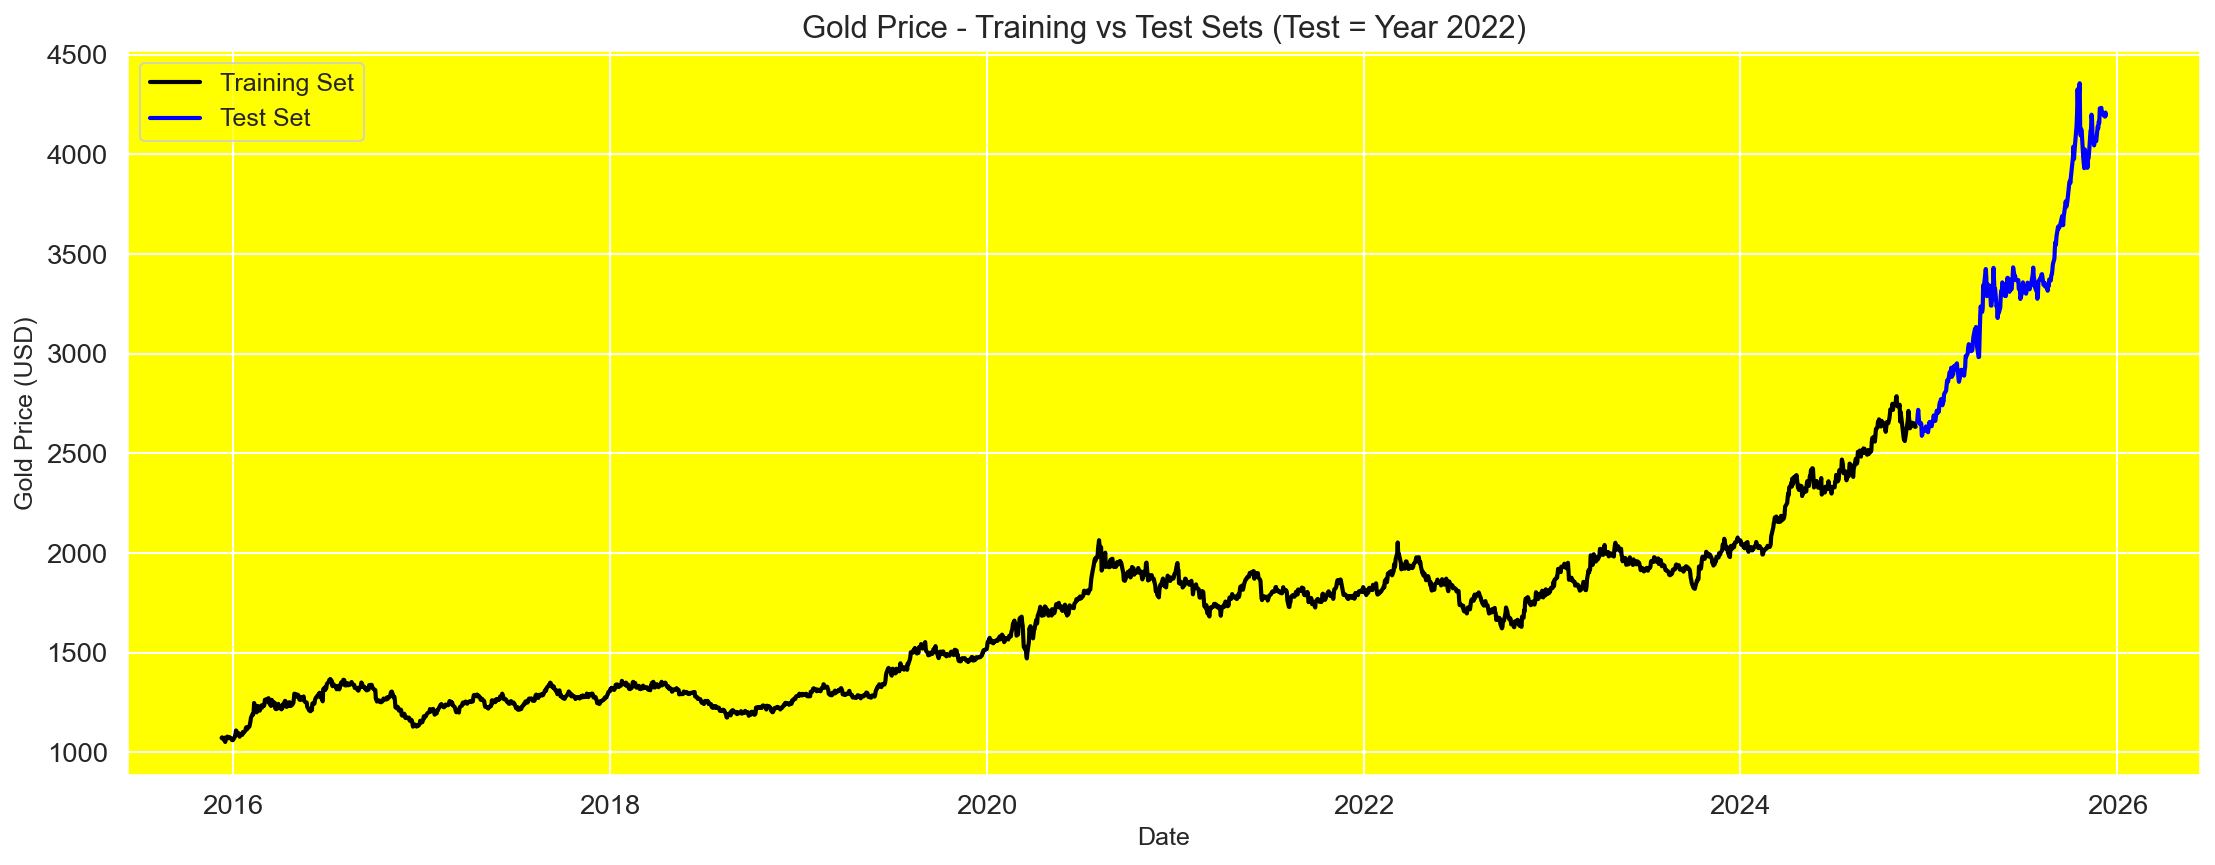

In [42]:
# For plotting, reset index so we have 'Date' column again
df_reset = df.reset_index()

# 🟡 Plot Train vs Test Sets
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes', edgecolor='white')

plt.plot(df_reset['Date'][:-test_size], df_reset['Close'][:-test_size], color='black', lw=2)
plt.plot(df_reset['Date'][-test_size:], df_reset['Close'][-test_size:], color='blue', lw=2)

plt.title('Gold Price - Training vs Test Sets (Test = Year 2022)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gold Price (USD)', fontsize=12)
plt.legend(['Training Set', 'Test Set'], loc='upper left', prop={'size': 12})
plt.grid(color='white')
plt.tight_layout()
plt.show()


# 🔹 STEP 5: Prepare Sequences for LSTM

In [43]:
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])  # 60 previous values
        y.append(data[i, 0])                # 61st value (target)
    return np.array(X), np.array(y)


# Set window size
window_size = 60

# Prepare training sequences
X_train, y_train = create_sequences(train_data, window_size)

# Prepare test sequences
X_test, y_test = create_sequences(test_data, window_size)

# Reshape input to 3D for LSTM: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


# 🔹 STEP 6: Build and Train the LSTM Model


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))  # Output layer

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20


c:\Users\acer\learn_data_science2\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0072 - val_loss: 0.0078
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.6234e-04 - val_loss: 0.0011
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.2869e-04 - val_loss: 7.6830e-04
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.2052e-04 - val_loss: 0.0011
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1815e-04 - val_loss: 0.0011
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.1513e-04 - val_loss: 9.3352e-04
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.1925e-04 - val_loss: 0.0016
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.1274e-04 - val_loss: 0.0019
Epoch 9/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 1.0684e-04 - val_loss: 0.0011
Epoch 10/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 1.0546e-04 - val_loss: 0.0012
Epoch 11/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.0873e-04 - val_loss: 6.5235e-04
Epoch 12/20
72/72 ━━━━

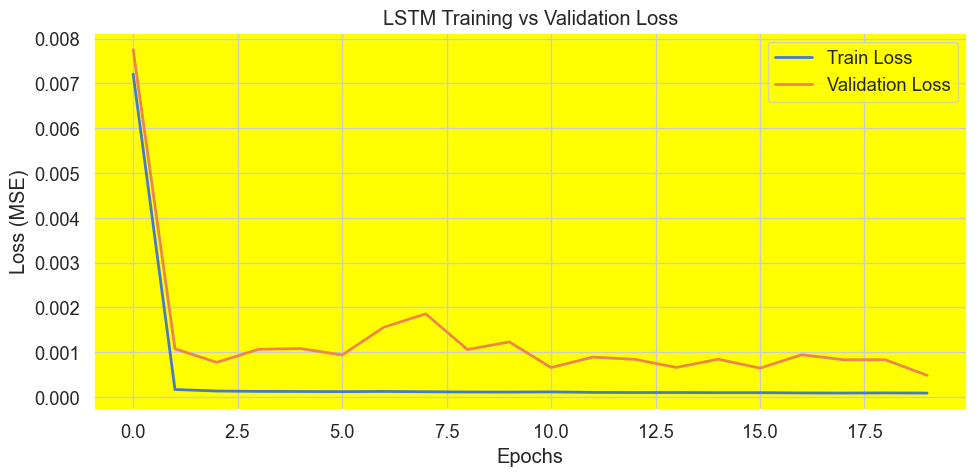

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('LSTM Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔹 STEP 7: Evaluation On Test Set

In [46]:
# Evaluate test loss (MSE)
result = model.evaluate(X_test, y_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7921e-04


In [47]:
from sklearn.metrics import mean_absolute_percentage_error

# Predict
y_pred = model.predict(X_test)

# Calculate MAPE and Accuracy
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Test Loss: 0.0004792071122210473
Test MAPE: 0.022212528947011086
Test Accuracy: 0.9777874710529889


In [48]:
# Inverse scale the predictions and actuals
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_pred)


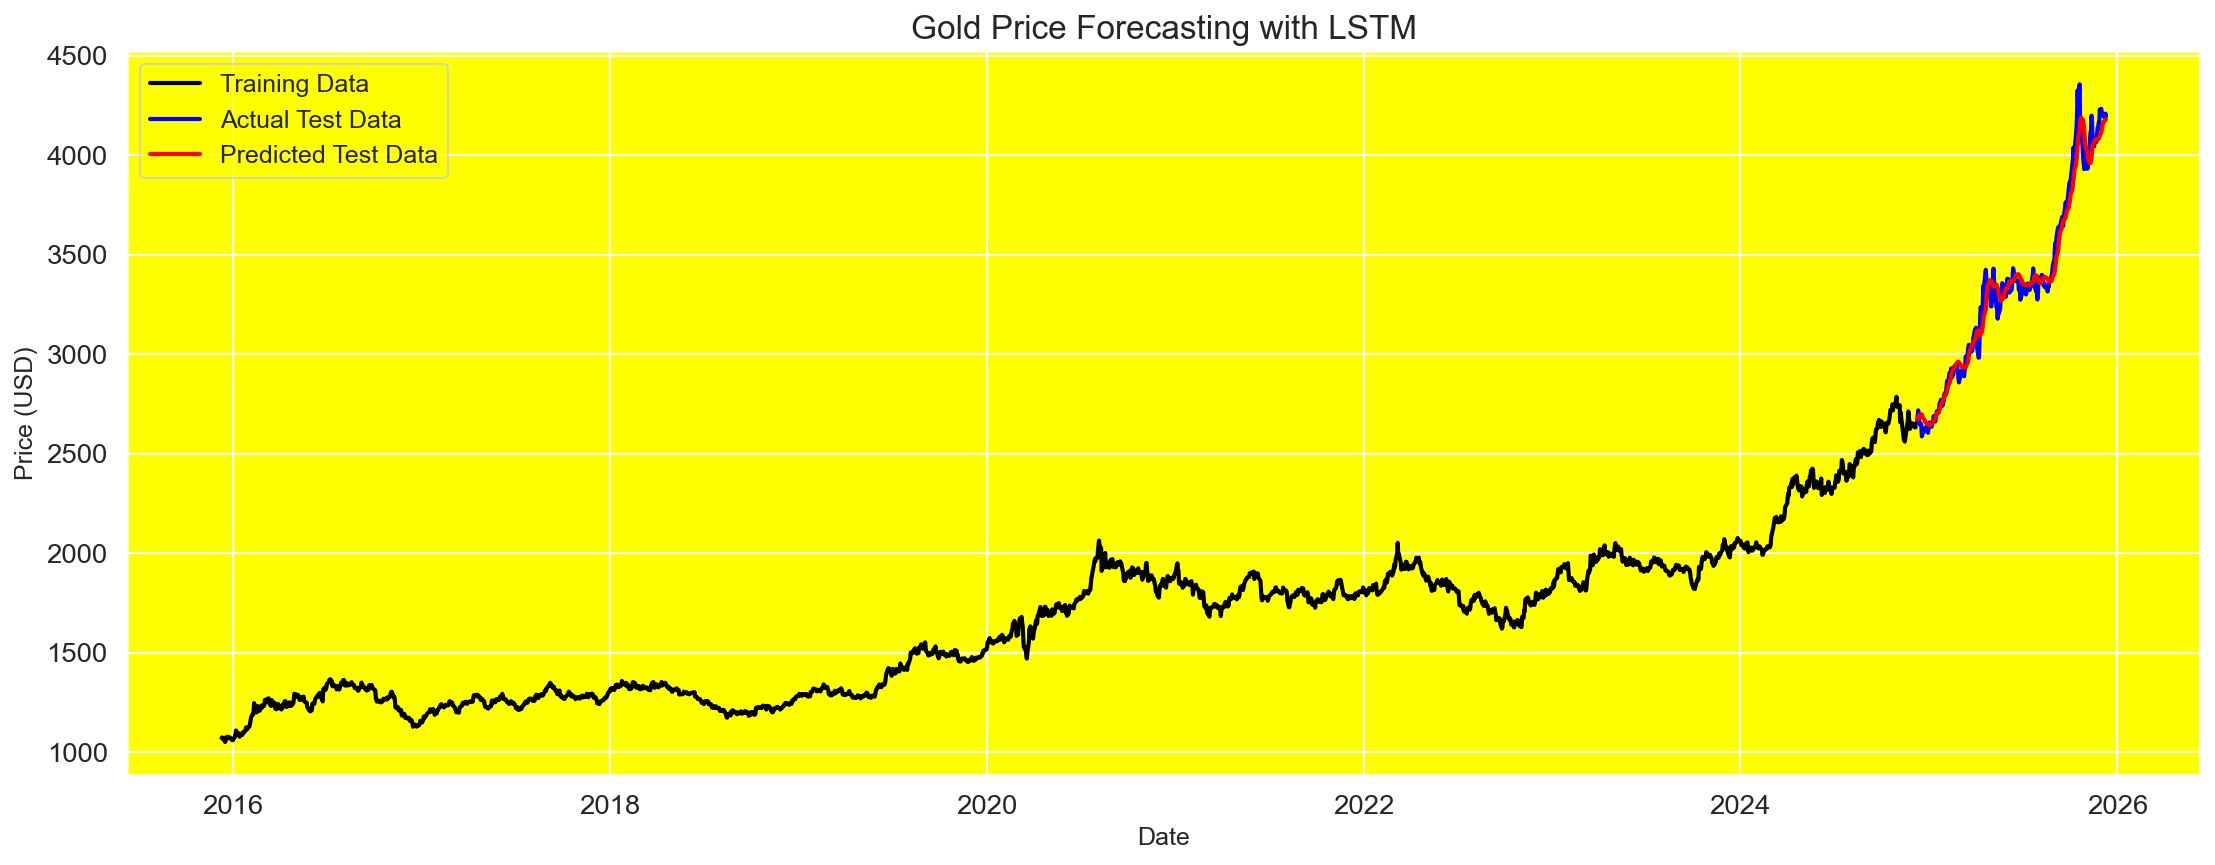

In [49]:
# Adjusted test_dates to match the length of y_test_pred/y_test_true
test_dates = df.index[-test_size - window_size:][-len(y_test_true):]
train_dates = df.index[:len(train_data)]  # matches scaler.inverse_transform(train_data)

# Plotting
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes', edgecolor='white')

plt.plot(train_dates, scaler.inverse_transform(train_data), color='black', lw=2, label='Training Data')
plt.plot(test_dates, y_test_true, color='blue', lw=2, label='Actual Test Data')
plt.plot(test_dates, y_test_pred, color='red', lw=2, label='Predicted Test Data')

plt.title('Gold Price Forecasting with LSTM', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(loc='upper left', prop={'size': 12})
plt.grid(color='white')
plt.tight_layout()
plt.show()
